In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# This is the code for the Linear Model
from statsmodels.formula.api import ols

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
from sklearn.model_selection import train_test_split
from pydataset import data

import warnings
warnings.filterwarnings('ignore')

### #1. Load the tips dataset from either pydataset or seaborn.

In [2]:
df = data('tips')

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

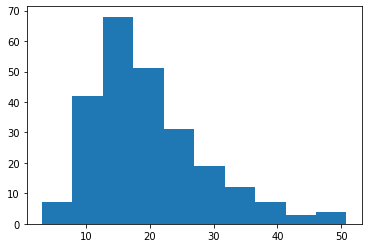

In [3]:
x = df['total_bill']
y = df['tip']
plt.hist(x)

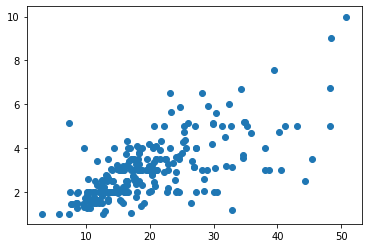

In [4]:
plt.scatter(x, y)

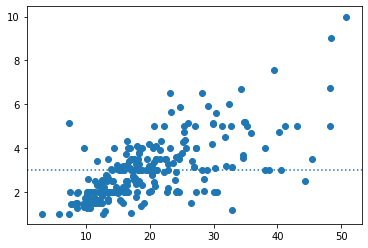

In [5]:
# plot data with baseline:
plt.scatter(x, y)
plt.axhline(y.mean(), ls = ':')

##### Reminder: 
x = 'total_bill' <br>
y = 'tip'

### #2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

#### Here is some sample code to get you started:

In [6]:
# from statsmodels.formula.api import ols

# model = ols('y ~ x', data=df).fit()
# predictions = model.predict(df.x)

#### The code above fits a linear regression model on the df dataset, using column y as the target and column x as the predictor. Modify the code as necessary to work with the tips dataset.

In [7]:
# Now we fit a regression model using OLS method.
# OLS = ordinary least squares.

from statsmodels.formula.api import ols

# generate parameters, i.e. create model
ols_model = ols('tip ~ total_bill', data=df).fit()

# compute predictions and add to original dataframe
df['yhat'] = ols_model.predict(x)
df['baseline'] = df.tip.mean()

df['residual'] = df.tip - df.yhat
df['baseline_residual'] = df.tip - df.baseline
df

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721
...,...,...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,3.969131,2.998279,1.950869,2.921721
241,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836,2.998279,-1.774836,-0.998279
242,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175,2.998279,-1.301175,-0.998279
243,17.82,1.75,Male,No,Sat,Dinner,2,2.791807,2.998279,-1.041807,-1.248279


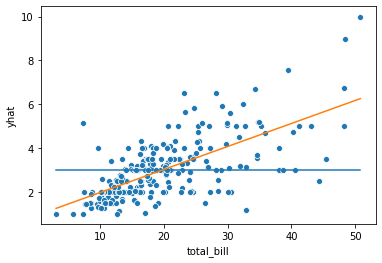

In [8]:
sns.scatterplot(df.total_bill, df.tip)
sns.lineplot(x='total_bill', y='baseline', data=df)
sns.lineplot(x='total_bill', y='yhat', data=df)


### #3.Plot the residuals for the linear regression model that you made.

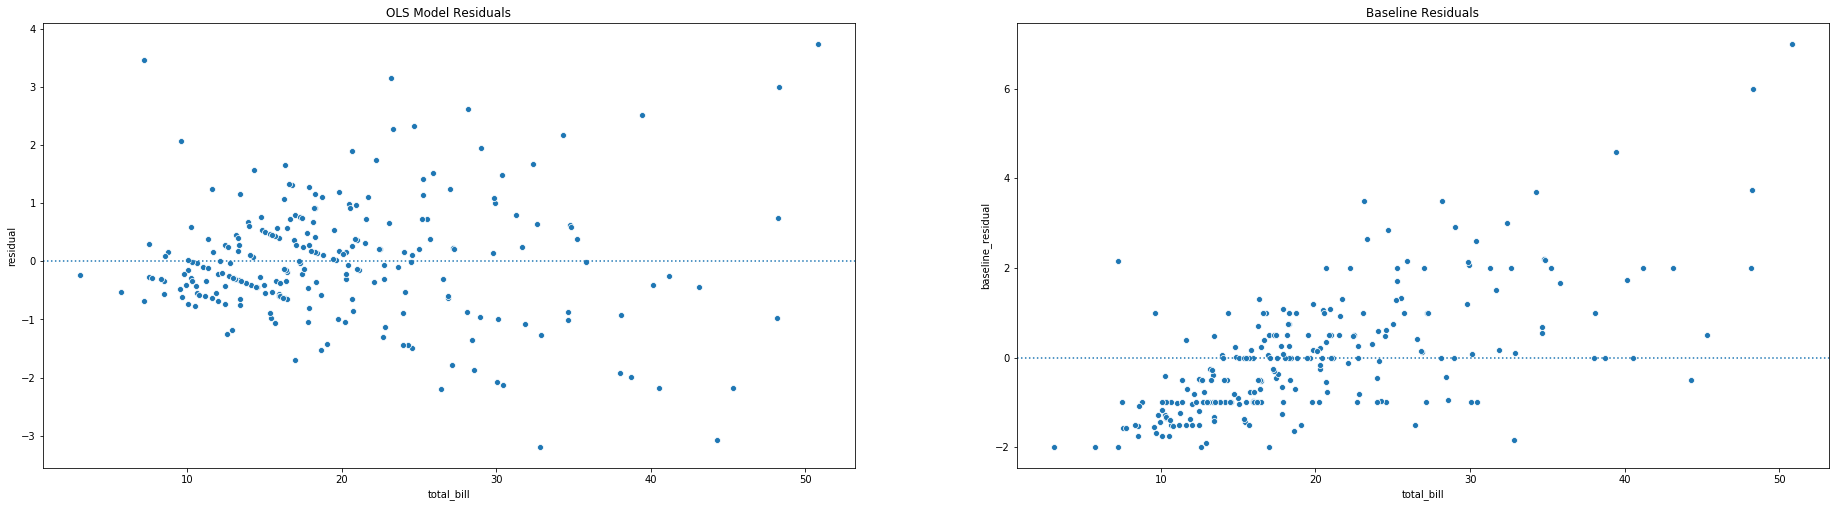

In [22]:
plt.figure(figsize=(32,18))
plt.subplot(221)
sns.scatterplot(df.total_bill, df.residual)
plt.axhline(y = 0, ls = ':')
plt.title('OLS Model Residuals');
plt.subplot(222)
sns.scatterplot(df.total_bill, df.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.title('Baseline Residuals');

### #4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [26]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721


#### Sum of Squared Errors (SSE)

In [27]:
df['residual^2'] = df.residual**2
df['baseline_residual^2'] = df.baseline_residual**2
SSE = df['residual^2'].sum()
SSE_baseline = df['baseline_residual^2'].sum()
df

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,baseline_residual,residual^2,baseline_residual^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279,2.871792,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279,0.119870,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721,0.139252,0.251724
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721,0.009458,0.097170
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721,0.011487,0.374203
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,3.969131,2.998279,1.950869,2.921721,3.805888,8.536455
241,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836,2.998279,-1.774836,-0.998279,3.150043,0.996560
242,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175,2.998279,-1.301175,-0.998279,1.693057,0.996560
243,17.82,1.75,Male,No,Sat,Dinner,2,2.791807,2.998279,-1.041807,-1.248279,1.085361,1.558200


In [34]:
print("SSE = ", SSE)
print("SSE Baseline = ", SSE_baseline)

SSE =  252.788743850776
SSE Baseline =  465.2124770491804


#### Explained Sum of Squares (ESS)

In [36]:
ESS = sum((df.yhat - df.tip.mean())**2)
print("ESS = ", ESS)

ESS =  212.4237331984042


#### Mean of Square Errors (MSE)

In [29]:
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)

MSE =  1.036019442011377
MSE baseline =  1.906608512496641


#### Root Mean Squared Error (RMSE)¶

In [30]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)
print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  1.0178504025697377
RMSE baseline =  1.3807999538298954


### #5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

### #6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [42]:
df_eval = pd.DataFrame(np.array(['SSE', 'MSE','RMSE']), columns=['metric'])
df_eval['model_error'] = np.array([SSE,  MSE, RMSE])
df_eval['baseline_error'] = np.array([SSE_baseline,MSE_baseline, RMSE_baseline])
df_eval['is_better_than_baseline'] = df_eval.baseline_error > df_eval.model_error
df_eval

,metric,model_error,baseline_error,is_better_than_baseline
0,SSE,252.788744,465.212477,True
1,MSE,1.036019,1.906609,True
2,RMSE,1.017850,1.380800,True


### #7. What is the amount of variance explained in your model?

In [47]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           6.69e-34
Time:                        17:09:15   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
print('R2: ', ols_model.rsquared)
print('R2: ', ols_model.rsquared_adj)
print('Parameters: ',ols_model.params)

R2:  0.45661658635167646
R2:  0.4543712003448651
Parameters:  Intercept     0.920270
total_bill    0.105025
dtype: float64


### #8. Is your model significantly better than the baseline model?

### #9. Create a file named evaluate.py that contains the following functions.
<ul>
<li> plot_residuals(y, yhat): creates a residual plot </li>
<li>regression_errors(y, yhat): returns the following values: </li>
    <ul>
    <li> sum of squared errors (SSE) </li>
    <li> explained sum of squares (ESS) </li>
    <li> total sum of squares (TSS) </li>
    <li> mean squared error (MSE) </li>
    <li> root mean squared error (RMSE) </li>
    </ul>
<li>baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model </li>
<li>better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false</li>
<li>model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)</li>
    </ul>

### #10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.